## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [304]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [305]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [306]:
#number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [307]:
#unique users
unique_users=df['user_id'].nunique()
unique_users


290584

d. The proportion of users converted.

In [308]:
#proportion of users converted
p_converted=df['converted'].value_counts()[1]/unique_users
p_converted


0.12126269856564711

e. The number of times the `new_page` and `treatment` don't match.

In [309]:
#number of times treatment group did not get the new_page
((df['group']=='control')&(df['landing_page']!='old_page')).value_counts()[1]+((df['group']=='treatment')&(df['landing_page']!='new_page')).value_counts()[1]

3893

f. Do any of the rows have missing values?

In [310]:
#no rows with missing values
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [311]:
#new dataframe df2
df2=df

In [312]:
#get index names for which group has value control and landing_page the value new_page
index_cont=df2[((df2.group=='control')&(df2.landing_page=='new_page'))].index

In [313]:
#drop these rows with index_cont from the dataframe
df2.drop(index_cont, inplace = True)

In [314]:
#get index names for which group has value treatment and landing_page the value old_page
index_treat=df2[((df2.group=='treatment')&(df2.landing_page=='old_page'))].index

In [315]:
#drop these rows with index_treat from the dataframe
df2.drop(index_treat, inplace=True)

In [316]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [317]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [318]:
#value_counts() returns values is descending order so the firts is 
#the most frequent
ids=df2['user_id'].value_counts()
row=ids.iloc[[0]]
row


773192    2
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [319]:
#finding the rows with same user_id
df2.loc[df['user_id'] == 773192]
#only the timestamp is different

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [320]:
# removing a duplicate returning the same dataframe
df2.drop_duplicates(subset='user_id', inplace=True)

In [321]:
#checking if one duplicate was actually removed
df2.loc[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [322]:
#probability of an individual converting regardless of the page received
p_convrt=((df2['converted'].value_counts())[1])/len(df2)
p_convrt


0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [323]:

p_controlandconverting=(((df2['group']=='control') & (df2['converted']==True)).value_counts()[1])/(df2['group']=='control').value_counts()[1]
p_controlandconverting


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [324]:
p_treatmentandconverting=(((df2['group']=='treatment') & (df2['converted']==True)).value_counts()[1])/(df2['group']=='treatment').value_counts()[1]
p_treatmentandconverting



0.11880806551510564

d. What is the probability that an individual received the new page?

In [325]:
p_newpage=((df2['landing_page']=='new_page').value_counts()[1])/len(df2)
p_newpage



0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The data shows that regardless of the page received the probability of converting is low and for each landing_page  the  probability of converting is as well low and aproximatly the same. From the current data analysis we don't have evidence that the new page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

** The Null hypothesis is that the old page is as good or better than the new , The Alternative hypothesis is that the new page is better. Using notation Ho: **$p_{new}$**-**$p_{old}$**<=0 or  H1:**$p_{new}$**-**$p_{old}$**>0  **

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [326]:

pnew=df2['converted'].mean()
pnew


0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [327]:
pold=df2['converted'].mean()
pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [328]:
n_new=(df2.group=='treatment').value_counts()[1]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [329]:
n_old=(df2.group=='control').value_counts()[1]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [330]:
new_page_converted=np.random.choice([0,1],size=n_new, p=[1-pnew,pnew])
new_page_converted

array([0, 0, 1, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [331]:
old_page_converted=np.random.choice([0,1],size=n_old,p=[1-pold,pold])
old_page_converted

array([0, 0, 1, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [332]:
diff = new_page_converted.mean()-old_page_converted.mean()
diff


-0.00029111001555282012

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [333]:
p_diffs = []
new_converted_simulation=np.random.binomial(n_new,pnew,10000)/n_new
old_converted_simulation=np.random.binomial(n_old,pold,10000)/n_old

p_diffs=new_converted_simulation-old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    4.,    52.,   268.,  1105.,  2325.,  2959.,  2132.,   903.,
          208.,    44.]),
 array([-0.00488882, -0.00398924, -0.00308965, -0.00219006, -0.00129048,
        -0.00039089,  0.0005087 ,  0.00140829,  0.00230787,  0.00320746,
         0.00410705]),
 <a list of 10 Patch objects>)

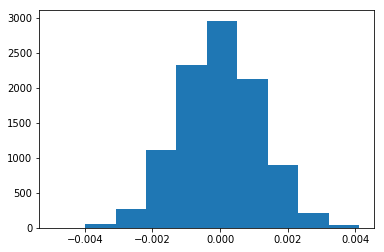

In [334]:
p_diffs=np.array(p_diffs)
plt.hist(p_diffs)


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [335]:
#Actual differences in conversion, infered from ab_data.csv
actual_diff=df2[df2['group']=='treatment']['converted'].mean()-df2[df2['group']=='control']['converted'].mean()
actual_diff
p_diffs=np.array(p_diffs)
(actual_diff<p_diffs).mean()


0.90300000000000002

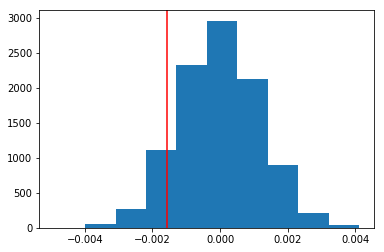

In [336]:
plt.hist(p_diffs)
plt.axvline(x=actual_diff,color='red')

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**<span style="color:blue"> With a p_value=0.9 larger than Type1_error=0.05 we fail to reject the null hypothesis.Which in pratical terms means the old_page is at least as good as the new_page in convertions</span>**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [337]:
import statsmodels.api as sm

convert_old=df2.query('group=="control"')['converted'].sum()
convert_new=df2.query('group=="treatment"')['converted'].sum()
n_old=df2.query('landing_page=="old_page"').shape[0]
n_new=df2.query('landing_page=="new_page"').shape[0]

print(n_old,n_new, convert_new, convert_old) 

#thanks to MohgaS mentor help in the forum

145274 145310 17264 17489


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [338]:
z_score, p_value=sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old], alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


In [339]:
from scipy.stats import norm
print(norm.ppf(1-(0.05)))

1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**<span style="color:blue">With a z-score=-1.31 wich is less than the z-critical= 1.64 we fail to reject the null.Also the p-value=0.9 agrees with the findings in parts j and k</span>**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**<span style="color:blue">Logistic Regression which is used to predict only two outcomes in this case conversion and no conversion.</span>**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [340]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [341]:
df2[['no_conversion', 'ab_page']]=pd.get_dummies(df2['group'])
df2=df2.drop('no_conversion', axis=1)
df2.head()


,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [342]:
df2['intercept']=1
log_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [343]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-15 15:37 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [344]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**<span style="color:blue"> H0:pnew-pold=0 and H1:pnew-pold!=0.The ab_page pvalue="0.1899" which is greater than type1 error 0.05 suggests that the relationship between (independent variable) converted and the(response variable) ab_page is statistically significant.The pvalue=0.9 in partII also fails to reject the null hypothesis, pnew-pold<=0 </span>**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**<span style="color:blue">We might be interested in finding which variables are really useful in predicting the conversion, but several problems may arise: 1)there is not a relationship between the predictor variables, 2)correlated errors,as this data is collected over time 3)having multicolliniarity, that response variables are related to each other</span>**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [345]:
#We are testing for the conversion of country and page

countries=pd.read_csv('countries.csv')
countries.dropna()
countries['country'].value_counts()
df2=df2.join(countries,lsuffix='_caller', rsuffix='_other')
df2[['US','UK','CA']]=pd.get_dummies(df2['country'])
df2=df2.drop('CA',axis=1)
df2.head()




,user_id_caller,timestamp,group,landing_page,converted,ab_page,intercept,user_id_other,country,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,834778.0,UK,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,928468.0,US,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,822059.0,UK,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,711597.0,UK,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,710616.0,UK,0,1


In [346]:
log_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page','US','UK']])
results=log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [347]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-15 15:37 AIC:              212783.0474
No. Observations:   290584           BIC:              212825.3660
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9891    0.0089  -224.0205  0.0000  -2.0065  -1.9717
ab_page      -0.0150    0.0114    -1.3084  0.1907  -0.0374   0.0074
US           -0.0258    0.0269    -0.9589  0.3376  -0.0785   0.0269
UK            0.0065    0.0134     0.4850  0.6277  -0.0197   0.0327
==================================================================

"""

In [348]:
np.exp(results.params)

intercept    0.136814
ab_page      0.985151
US           0.974541
UK           1.006502
dtype: float64

**<span style="color:blue">For every new_page the probability to convert is 0.9 times more likely holding other variables constant. For US and newpage the probability of converting is 0.9 times more likey holding other variables constant. For UK is probablity 1, meaning all US new page are conversions. 
    conversion=ab_page*0.98+US_abpage+UK_abpage+0.13</span>**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [349]:
#Interactions of page and countries
df_new=df2
df_new['ab_uk']=df_new['ab_page']*df_new['UK']
df_new['ab_us']=df_new['ab_page']*df_new['US']
df_new.head()

,user_id_caller,timestamp,group,landing_page,converted,ab_page,intercept,user_id_other,country,US,UK,ab_uk,ab_us
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,834778.0,UK,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,928468.0,US,0,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,822059.0,UK,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,711597.0,UK,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,710616.0,UK,0,1,0,0


In [350]:
log_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page','UK','US','ab_us','ab_uk']])
results=log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [351]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-15 15:37 AIC:              212784.6547
No. Observations:   290584           BIC:              212848.1326
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9859    0.0096  -206.7920  0.0000  -2.0047  -1.9670
ab_page      -0.0215    0.0136    -1.5817  0.1137  -0.0482   0.0052
UK            0.0013    0.0188     0.0669  0.9467  -0.0356   0.0381
US           -0.0675    0.0385    -1.7528  0.0796  -0.1430   0.0080
ab_us         0.0825    0.0538     1.5339  0.1251  -0.0229   0.1880
ab_uk         0.0105    0.0267     0.3937  0.6938  -0.0419   0.0629
==================================================================

"""

In [352]:
np.exp(results.params)

intercept    0.137263
ab_page      0.978684
UK           1.001259
US           0.934719
ab_us        1.086035
ab_uk        1.010578
dtype: float64

**<span style="color:blue"> We test for interactions of page and countries. Convertion=0.9*ab_page+0+1*UK+0.9*US+0.1372*ab_us*ab_uk</span>**

**<span style="color:red">CONCLUSION: We have failed to reject the null therefore there no statistically significative evidence that the new_page is better.</span>**

In [354]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0